In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

bias = 10

X, y, coef = make_regression(n_samples=100, n_features=1, noise=5, random_state=42, coef=True, bias=bias)

coef

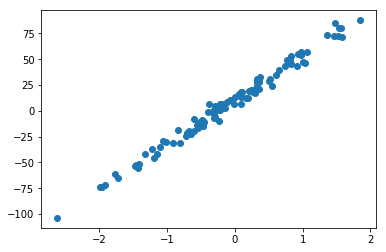

In [92]:
plt.scatter(X, y)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

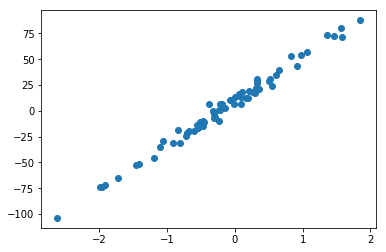

In [95]:
plt.scatter(X_train, y_train)

In [96]:
model = LinearRegression()

In [97]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
model.coef_, model.intercept_

(array([42.84588804]), 9.738058869060154)

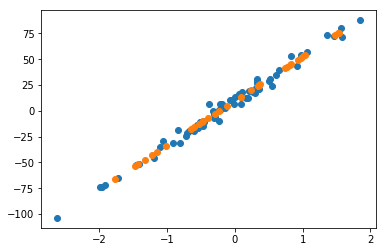

In [99]:
plt.scatter(X_train, y_train)

plt.scatter(X_test, model.predict(X_test))

In [100]:
class LinearRegCustom:
    
    def __init__(self, lr=.01, max_iters=20):
        self.lr = lr
        self.max_iters = max_iters
        
        
    def fit(self, X, y):
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        errs = []
        for i in range(self.max_iters):
            #this line have been added for mini batch
            indices = np.random.randint(0, len(X), len(X)//10)
            self.gradient_decend(X[indices], y[indices])
            errs.append(self.error(X, y))
        
        return errs
            
    
    def gradient_decend(self, X, y):
        delta_coef, delta_inter = self.gradient(X, y)
        self.coef_ += delta_coef
        self.intercept_ += delta_inter
        
    def gradient(self, X, y):
        ya = y.reshape(-1, 1)
        yh = self.predict(X)
        e = yh - ya
        
        de2m = np.mean(e * X)
        de2c = np.mean(e * 1)
        
        return -de2m*self.lr, -de2c*self.lr
    
    def error(self, X, y):
        ya = y.reshape(-1, 1)
        yh = self.predict(X)
        e = yh - ya
        return np.mean(e**2)
        
    
    def predict(self, X):
        return self.coef_ * X + self.intercept_

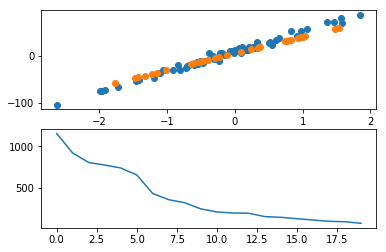

In [101]:
m2 = LinearRegCustom(lr=.1)

errors = m2.fit(X_train, y_train)

plt.figure()
plt.subplot(2, 1, 1)
plt.scatter(X_train, y_train)
plt.scatter(X_test, m2.predict(X_test))
plt.subplot(2, 1, 2)
plt.plot(errors)
plt.show()

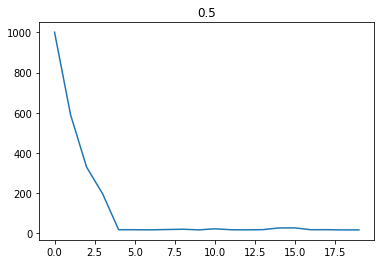

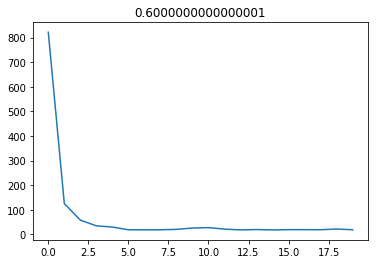

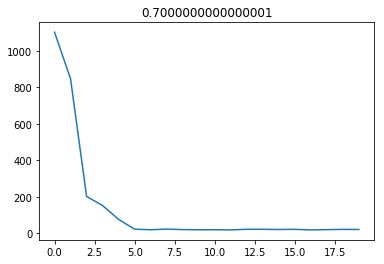

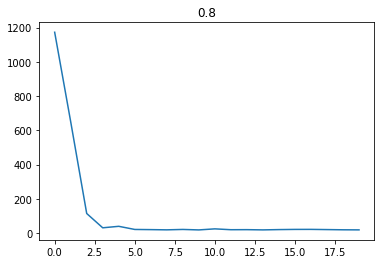

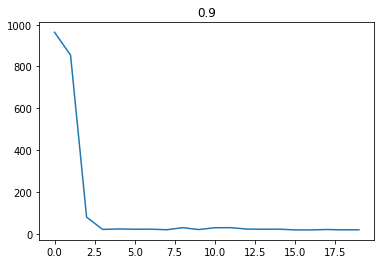

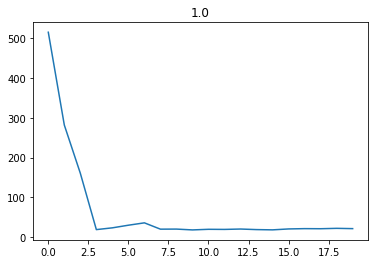

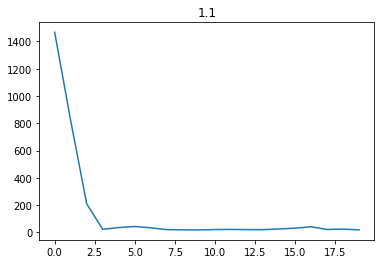

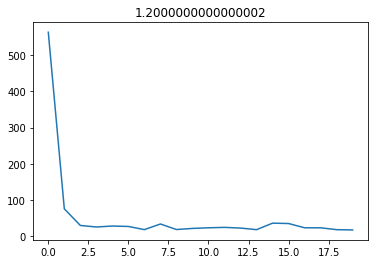

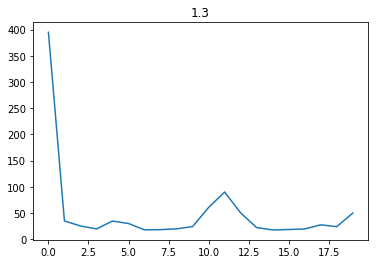

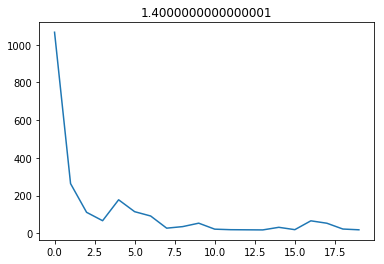

In [102]:
for i in range(5, 15):
    lr = .1 * i
    m2 = LinearRegCustom(lr=lr)
    errors = m2.fit(X_train, y_train)
    plt.figure()
    plt.title(str(lr))
    plt.plot(errors)
    plt.show()